In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

sns.set(rc={'figure.figsize':(12,10)})

import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv('/content/BlackFriday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
df.duplicated().sum()     #checking for duplicate values

0

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
# handling missing values
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)

df['Product_Category_3'].fillna(df['Product_Category_3'].mean(),inplace=True)

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
categorical_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# Feature Engineering

In [11]:
# 1. Aggregate Purchase Amounts
df['Total_Purchase_Per_User'] = df.groupby('User_ID')['Purchase'].transform('sum')
df['Mean_Purchase_Per_User'] = df.groupby('User_ID')['Purchase'].transform('mean')
df['Count_Purchase_Per_User'] = df.groupby('User_ID')['Purchase'].transform('count')

df['Total_Purchase_Per_Product'] = df.groupby('Product_ID')['Purchase'].transform('sum')
df['Mean_Purchase_Per_Product'] = df.groupby('Product_ID')['Purchase'].transform('mean')
df['Count_Purchase_Per_Product'] = df.groupby('Product_ID')['Purchase'].transform('count')


In [12]:
# 2. Interaction Features
df['User_Product_Interaction'] = df['User_ID'].astype(str) + '_' + df['Product_ID'].astype(str)
df['User_Age_Interaction'] = df['User_ID'].astype(str) + '_' + df['Age'].astype(str)
df['User_City_Interaction'] = df['User_ID'].astype(str) + '_' + df['City_Category'].astype(str)

# Label Encoding for 'Product_ID'
le = LabelEncoder()
df['Product_ID'] = le.fit_transform(df['Product_ID'])


In [13]:
# Encoding interaction features using frequency
interaction_cols = ['User_Product_Interaction', 'User_Age_Interaction', 'User_City_Interaction']
for col in interaction_cols:
    freq_encoding = df[col].value_counts().to_dict()
    df[col + '_Freq'] = df[col].map(freq_encoding)
    df.drop(col, axis=1, inplace=True)


In [14]:
# 3. Frequency Encoding for Categorical Variables
for col in categorical_columns:
    freq_encoding = df[col].value_counts().to_dict()
    df[col + '_Freq'] = df[col].map(freq_encoding)


In [15]:
# 4. Normalize numerical features
numerical_columns = ['Total_Purchase_Per_User', 'Mean_Purchase_Per_User', 'Count_Purchase_Per_User',
                     'Total_Purchase_Per_Product', 'Mean_Purchase_Per_Product', 'Count_Purchase_Per_Product']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [16]:
# Drop original categorical columns
df.drop(categorical_columns, axis=1, inplace=True)


In [17]:
df

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Total_Purchase_Per_User,Mean_Purchase_Per_User,...,Total_Purchase_Per_Product,Mean_Purchase_Per_Product,Count_Purchase_Per_Product,User_Product_Interaction_Freq,User_Age_Interaction_Freq,User_City_Interaction_Freq,Gender_Freq,Age_Freq,City_Category_Freq,Stay_In_Current_City_Years_Freq
0,1000001,670,10,0,3,9.842144,12.66984,8370,-1.063753,0.287691,...,-0.389530,0.600631,-0.613906,1,34,34,132197,14707,144638,99459
1,1000001,2374,10,0,1,6.000000,14.00000,15200,-1.063753,0.287691,...,0.862610,1.652262,0.362761,1,34,34,132197,14707,144638,99459
2,1000001,850,10,0,12,9.842144,12.66984,1422,-1.063753,0.287691,...,-0.859011,-1.921510,-0.955320,1,34,34,132197,14707,144638,99459
3,1000001,826,10,0,12,14.000000,12.66984,1057,-1.063753,0.287691,...,-0.790780,-1.870528,-0.297679,1,34,34,132197,14707,144638,99459
4,1000002,2732,16,0,8,9.842144,12.66984,7969,-0.742361,0.805744,...,-0.592072,-0.383461,-0.672674,1,76,76,405380,20903,166446,82889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,1829,16,0,1,2.000000,12.66984,11664,-0.822192,0.999829,...,0.746013,1.179310,0.463507,1,63,63,405380,107499,166446,189192
537573,1004737,1018,16,0,1,15.000000,16.00000,19196,-0.822192,0.999829,...,2.150024,1.600656,1.577300,1,63,63,405380,107499,166446,189192
537574,1004737,3316,16,0,8,15.000000,12.66984,8043,-0.822192,0.999829,...,-0.701158,-0.534778,-0.851777,1,63,63,405380,107499,166446,189192
537575,1004737,2736,16,0,5,9.842144,12.66984,7172,-0.822192,0.999829,...,-0.228876,-0.640592,0.234032,1,63,63,405380,107499,166446,189192


In [18]:
# Split data into features and target variable
X = df.drop('Purchase', axis=1)
y = df['Purchase']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Building  model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))


In [22]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [23]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [24]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=40, batch_size=32, callbacks=[early_stopping])     #increase the epoch to reduce it more

Epoch 1/60
13440/13440 [==============================] - 46s 3ms/step - loss: 12161317.0000 - val_loss: 6733863.5000
Epoch 2/60
13440/13440 [==============================] - 37s 3ms/step - loss: 10274342.0000 - val_loss: 6791147.0000
Epoch 3/60
13440/13440 [==============================] - 37s 3ms/step - loss: 10228441.0000 - val_loss: 6580599.5000
Epoch 4/60
13440/13440 [==============================] - 48s 4ms/step - loss: 10186079.0000 - val_loss: 6582867.0000
Epoch 5/60
13440/13440 [==============================] - 42s 3ms/step - loss: 10140051.0000 - val_loss: 6660138.5000
Epoch 6/60
13440/13440 [==============================] - 40s 3ms/step - loss: 10121141.0000 - val_loss: 6592706.5000
Epoch 7/60
13440/13440 [==============================] - 36s 3ms/step - loss: 10094786.0000 - val_loss: 6740256.5000
Epoch 8/60
13440/13440 [==============================] - 39s 3ms/step - loss: 10057098.0000 - val_loss: 6702126.5000
Epoch 9/60
13440/13440 [==============================] 

In [25]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss}")
print(f"Testing Loss: {test_loss}")


Training Loss: 6450569.5
Testing Loss: 6477281.0


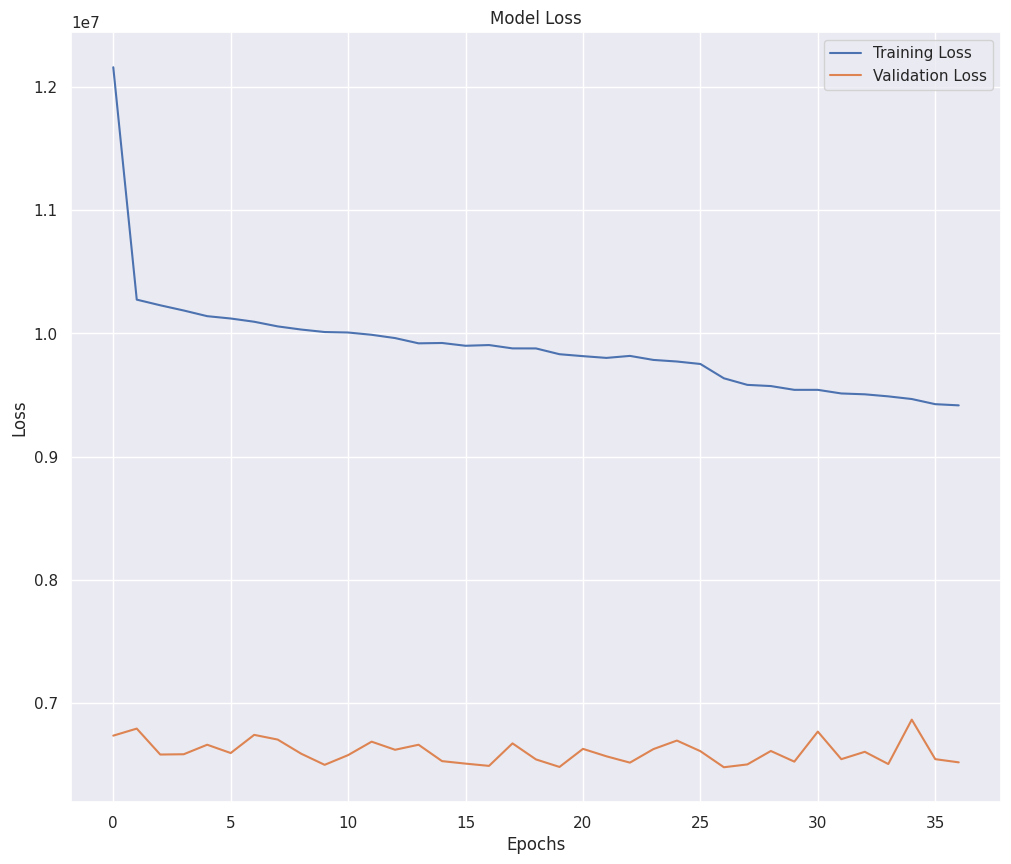

In [26]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()